# imports

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau,CSVLogger
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,GlobalMaxPool1D,Embedding,Conv1D, GlobalMaxPooling1D, Bidirectional,LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
import shutil
import re
!pip install unidecode
!pip install contractions
import contractions
import unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
!pip install unidecode
!pip install contractions
!pip install nlpaug
!pip install transformers
import transformers
import nlpaug
import contractions
import unidecode 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

#Data Preprocessing

In [50]:
from google.colab import drive
drive.mount("/content/gdrive")

train1 = pd.read_csv('/content/gdrive/MyDrive/Twitter_Data.csv')
#valid1 = pd.read_csv('/content/gdrive/MyDrive/valid1.csv')
train2 = pd.read_csv('/content/gdrive/MyDrive/train2.csv')
#valid 2 doesn't have labels

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [51]:
train1.head(10)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [52]:
train1.shape

(162980, 2)

In [53]:
train1['category'][train1['category']==-1]='Negative'
train1['category'][train1['category']==0]='Neutral'
train1['category'][train1['category']==1]='Positive'

<ipython-input-53-7d6327620420>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['category'][train1['category']==-1]='Negative'


In [54]:
train2['label'][train2['label']==0]='Positive'
train2['label'][train2['label']==1]='Negative'
train2['label'][train2['label']==2]='Neutral'

<ipython-input-54-0683bc411176>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['label'][train2['label']==0]='Positive'
<ipython-input-54-0683bc411176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['label'][train2['label']==1]='Negative'
<ipython-input-54-0683bc411176>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['label'][train2['label']==2]='Neutral'


In [55]:
train2.drop('id',inplace=True,axis=1)

In [56]:
train2.rename(columns={'tweet':'Tweet'},inplace=True)

In [57]:
train2

,label,Tweet
0,Positive,@user when a father is dysfunctional and is s...
1,Positive,@user @user thanks for #lyft credit i can't us...
2,Positive,bihday your majesty
3,Positive,#model i love u take with u all the time in ...
4,Positive,factsguide: society now #motivation
...,...,...
31957,Positive,ate @user isz that youuu?ðððððð...
31958,Positive,to see nina turner on the airwaves trying to...
31959,Positive,listening to sad songs on a monday morning otw...
31960,Negative,"@user #sikh #temple vandalised in in #calgary,..."


In [58]:
train1.columns=['Tweet','label']

In [59]:
dataset=pd.concat([train1,train2])

In [60]:
dataset

,Tweet,label
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
31957,ate @user isz that youuu?ðððððð...,Positive
31958,to see nina turner on the airwaves trying to...,Positive
31959,listening to sad songs on a monday morning otw...,Positive
31960,"@user #sikh #temple vandalised in in #calgary,...",Negative


In [61]:
dataset['label']=pd.get_dummies(dataset['label']).values

In [62]:
dataset

,Tweet,label
0,when modi promised “minimum government maximum...,1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,0
3,asking his supporters prefix chowkidar their n...,0
4,answer who among these the most powerful world...,0
...,...,...
31957,ate @user isz that youuu?ðððððð...,0
31958,to see nina turner on the airwaves trying to...,0
31959,listening to sad songs on a monday morning otw...,0
31960,"@user #sikh #temple vandalised in in #calgary,...",1


In [63]:
dataset

,Tweet,label
0,when modi promised “minimum government maximum...,1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,0
3,asking his supporters prefix chowkidar their n...,0
4,answer who among these the most powerful world...,0
...,...,...
31957,ate @user isz that youuu?ðððððð...,0
31958,to see nina turner on the airwaves trying to...,0
31959,listening to sad songs on a monday morning otw...,0
31960,"@user #sikh #temple vandalised in in #calgary,...",1


In [64]:
def preprocess(text):
    text = unidecode.unidecode(text) 
    text = contractions.fix(text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)                     
    text = re.sub('[\t\n]', ' ', text) 
    text = re.sub(r'www.[^ ]+', '', text)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) 
    text = re.sub(r'https?://[^ ]+', '', text)
    text = re.sub('[^A-Za-z]+', ' ', text) 
    text = re.sub(' +', ' ', text) 
    text = text.strip().lower() 
    return text

In [65]:
dataset['Tweet']=dataset['Tweet'].astype(str)

In [66]:
dataset.Tweet=dataset.Tweet.apply(lambda x: preprocess(x))

In [67]:
dataset

,Tweet,label
0,when modi promised minimum government maximum ...,1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp to...,0
3,asking his supporters prefix chowkidar their n...,0
4,answer who among these the most powerful world...,0
...,...,...
31957,ate isz that youuu ddddddddda i,0
31958,to see nina turner on the airwaves trying to w...,0
31959,listening to sad songs on a monday morning otw...,0
31960,vandalised in in condemns act,1


In [68]:

train1.dropna(inplace=True)

In [69]:
dataset

,Tweet,label
0,when modi promised minimum government maximum ...,1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp to...,0
3,asking his supporters prefix chowkidar their n...,0
4,answer who among these the most powerful world...,0
...,...,...
31957,ate isz that youuu ddddddddda i,0
31958,to see nina turner on the airwaves trying to w...,0
31959,listening to sad songs on a monday morning otw...,0
31960,vandalised in in condemns act,1


# Tokenization

In [24]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [70]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(dataset['Tweet'].values)
X = tokenizer.texts_to_sequences(dataset['Tweet'].values)


In [71]:
longest_train = max(dataset['Tweet'].values, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

In [72]:
X = pad_sequences(X,length_long_sentence,padding='post')

In [73]:
vocab_length = len(tokenizer.word_index) + 1

In [74]:
Y=dataset['label'].values

#Word embedding

In [75]:
embeddings_dictionary = dict()
embedding_dim = 100

In [31]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-12-06 20:25:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-06 20:25:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-06 20:25:57--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [76]:
with open('glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions
embedding_matrix = np.zeros((vocab_length, embedding_dim))

In [77]:
for word, index in tokenizer.word_index.items(): 
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [78]:
X=X.tolist()

In [79]:
Y=Y.tolist()

#Splitting the data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.25
)

In [81]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.25
)

In [82]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

#Model

#Architecture 1, including Attenion

In [83]:
from keras.layers import Layer
import keras.backend as K

In [84]:
length_long_sentence

54

In [85]:
#Defining attention layers
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
      return super(attention,self).get_config()


#Approach 1

In [86]:
model=Sequential([Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=length_long_sentence),
              Dropout(0.5),
              Conv1D(32,2,padding='valid', activation='relu'),
              Conv1D(64,2,padding='valid',activation='relu'),
              GlobalMaxPooling1D(),
              tf.keras.layers.Reshape((1,64,), input_shape=(None,64)),
              attention(),
              tf.keras.layers.Reshape((1,64,), input_shape=(None,64)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,108,), input_shape=(None,108)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,108,), input_shape=(None,108)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,108,), input_shape=(None,108)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,108,), input_shape=(None,108)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,108,), input_shape=(None,108)),
              GlobalMaxPool1D(),
              BatchNormalization(),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              Dropout(0.8),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              Dropout(0.8),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(3, activation = 'softmax')])
#

#Approach 2

In [ ]:
model=Sequential([Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=length_long_sentence),
              Dropout(0.5),
              Conv1D(32,2,padding='valid', activation='relu'),
              Conv1D(64,2,padding='valid',activation='relu'),
              GlobalMaxPooling1D(),
              tf.keras.layers.Reshape((1,64,), input_shape=(None,64)),
              attention(),
              tf.keras.layers.Reshape((1,64,), input_shape=(None,64)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,108,), input_shape=(None,108)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,108,), input_shape=(None,108)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,108,), input_shape=(None,108)),
              GlobalMaxPool1D(),
              BatchNormalization(),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              Dropout(0.8),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              Dropout(0.8),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(3, activation = 'softmax')])
#

In [45]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [46]:
# X_train = np.asarray(X_train).astype(np.float32)
# y_train = np.asarray(y_train).astype(np.float32)

history = model.fit(
    X_train, 
    y_train, 
    epochs = 30,
    batch_size = 128,
    validation_data = (X_val, y_val),
    verbose = 1
)

Epoch 1/30
857/857 [==============================] - 191s 192ms/step - loss: 0.6073 - accuracy: 0.8129 - val_loss: 0.3556 - val_accuracy: 0.8754
Epoch 2/30
857/857 [==============================] - 163s 190ms/step - loss: 0.3521 - accuracy: 0.8677 - val_loss: 0.2987 - val_accuracy: 0.8983
Epoch 3/30
857/857 [==============================] - 158s 185ms/step - loss: 0.3195 - accuracy: 0.8921 - val_loss: 0.2796 - val_accuracy: 0.9139
Epoch 4/30
857/857 [==============================] - 159s 185ms/step - loss: 0.3031 - accuracy: 0.9029 - val_loss: 0.2870 - val_accuracy: 0.9122
Epoch 5/30
857/857 [==============================] - 178s 207ms/step - loss: 0.2969 - accuracy: 0.9067 - val_loss: 0.2913 - val_accuracy: 0.9120
Epoch 6/30
857/857 [==============================] - 163s 190ms/step - loss: 0.2863 - accuracy: 0.9108 - val_loss: 0.2720 - val_accuracy: 0.9221
Epoch 7/30
857/857 [==============================] - 159s 185ms/step - loss: 0.2816 - accuracy: 0.9125 - val_loss: 0.2638 -

In [ ]:
tf.keras.utils.plot_model(model, to_file='architecture1sentiment.pdf', show_shapes=True)


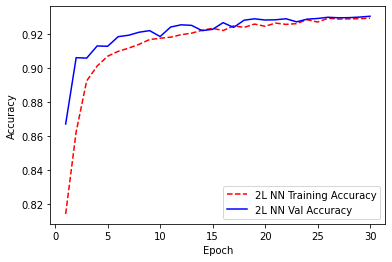

In [ ]:
# Get training and validation accuracy histories
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, 30 + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['2L NN Training Accuracy', '2L NN Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

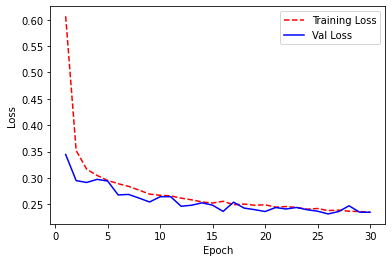

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
preds = model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)

1523/1523 [==============================] - 14s 7ms/step - loss: 0.2346 - accuracy: 0.9298


In [ ]:
preds= np.argmax(model.predict(X_test), axis=-1)
#printing classification_report & confusion_matrix
print(classification_report(y_test,preds ))
print(confusion_matrix(y_test, preds))

1523/1523 [==============================] - 9s 5ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     39276
           1       0.88      0.75      0.81      9460

    accuracy                           0.93     48736
   macro avg       0.91      0.86      0.88     48736
weighted avg       0.93      0.93      0.93     48736

[[38258  1018]
 [ 2318  7142]]


In [87]:
model.save('/content/gdrive/MyDrive/weights_sentiment_analysisbest')

# BERT

inspried by:https://www.kaggle.com/code/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert/notebook


In [ ]:
X = dataset['Tweet'].values
Y=dataset['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.25
)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.25
)

In [ ]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tokenizers import BertWordPieceTokenizer
from keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:
a=dataset['Tweet']
b=dataset['label'].map({0: 'Negative', 1: 'Positive', 2:'Neutral'})
#c=df0['class']
df= pd.concat([a,b], axis=1)
positive, negative = np.bincount(dataset['label'])
total = positive + negative
print('Examples:\n    Total: {}\n    positive: {} ({:.2f}% of total)\n'.format(
    total, positive, 100 * positive / total))
print('Examples:\n    Total: {}\n    negative: {} ({:.2f}% of total)\n'.format(
    total, negative, 100 * negative / total))
    
x= dataset['Tweet']
y=dataset['label']

texts = x
target = y

Examples:
    Total: 194942
    positive: 157190 (80.63% of total)

Examples:
    Total: 194942
    negative: 37752 (19.37% of total)



In [ ]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [ ]:
#IMP DATA FOR CONFIG
import tensorflow as tf
AUTO = tf.data.experimental.AUTOTUNE


# Configuration
EPOCHS = 3
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
MAX_LEN = 192

In [ ]:
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=False)
fast_tokenizer

Tokenizer(vocabulary_size=119547, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=False, wordpieces_prefix=##)

In [ ]:
X_train

array(['not feeling myself right now dd hate crying',
       'and yes this good point but not sure will watch that movie even though strong modi supporter',
       'this election not fight for power but for the soul india itself our most cherished values secularism diversity and pluralism are under attack exclusive interview for',
       ...,
       'you know much test were meant coincide what you have failed modi achieved matter disgrace for you understand but have sense pride drdo',
       'may you missed this tweet wait you are antimodi may do not follow him did not see this you are excused',
       'first shooting day today'], dtype=object)

In [ ]:
df1 = pd.DataFrame(X_train)
df2 = pd.DataFrame(X_val)
df3 = pd.DataFrame(X_test)
df4 = pd.DataFrame(y_train)
df5 = pd.DataFrame(y_val)

In [ ]:
df6=pd.concat([df1, df4], axis=1)
df7=pd.concat([df2, df5], axis=1)

In [ ]:
df6.head(100)

,0,0
0,not feeling myself right now dd hate crying,0
1,and yes this good point but not sure will watc...,0
2,this election not fight for power but for the ...,0
3,this just sample see the people followed naren...,0
4,ayo pavvam there many tamil dummil adimaigal j...,0
...,...,...
95,first ask modi react farmers protesting alread...,1
96,ali spoke the about white folks,0
97,have you seen any bjp worker talking about iss...,1
98,,0


In [ ]:
df3.columns =['Tweet']
df6.columns =['Tweet', 'label']
df7.columns =['Tweet', 'label']

In [ ]:
df7.head(100)

,Tweet,label
0,former chief saraswat says upa blocked asat mi...,0
1,modi not the real hindu but there any differen...,0
2,arvind kejriwal our country facing emergencyli...,0
3,need more governmental institutions for better...,0
4,allie says every needs this list,0
...,...,...
95,remember for every rss footsoldier instruction...,1
96,why genius technocrats are willing work with m...,0
97,they canceled the disneyland fireworks the day...,0
98,by david ha charleston vfw post,0


In [ ]:
df3.head(100)

,Tweet
0,modi promised per month farmers totally per ye...
1,what modi gave the people india who were glued...
2,please tell what you not like about modi
3,indeed
4,best for is
...,...
95,block print cotton gives yet look this kurta a...
96,india today nationalism modi brahmastra and mo...
97,funds from pradhanmantri rahat kosh are distri...
98,d the deafening silence from anti racist activ...


In [ ]:
x_train = fast_encode(df6.Tweet.astype(str), fast_tokenizer, maxlen=MAX_LEN)
x_valid = fast_encode(df7.Tweet.astype(str), fast_tokenizer, maxlen=MAX_LEN)
x_test = fast_encode(df3.Tweet.astype(str), fast_tokenizer, maxlen=MAX_LEN)

y_train = df6.label.values
y_valid = df7.label.values

  0%|          | 0/429 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/191 [00:00<?, ?it/s]

In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_valid, y_valid))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_test,y_test))
    .batch(BATCH_SIZE)
)
test_dataset2 = (
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(BATCH_SIZE)
)


In [ ]:
def build_model(transformer, max_len=512):
    """
    function for training the BERT model
    """
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
def build_model(transformer, max_len=512):
    """
    function for training the BERT model
    """
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(2, activation='softmax')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.trainable = True
    regularizer = tf.keras.regularizers.l2(0.01)
    
    for layer in model.layers:
      for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)
    model.compile(Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
%%time
with strategy.scope():
    transformer_layer = (
        transformers.TFDistilBertModel
        .from_pretrained('distilbert-base-multilingual-cased')
    )
    model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 192)]            0         
                                                                 
 tf_distil_bert_model_2 (TFD  TFBaseModelOutput(last_h  134734080
 istilBertModel)             idden_state=(None, 192,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem_2   (None, 768)              0         
 (SlicingOpLambda)                                               
                                                                 
 dense_2 (Dense)             (None, 2)                 1538      
                                                           

In [ ]:
n_steps = x_train.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    validation_data=valid_dataset,
    epochs=EPOCHS
)

Epoch 1/3
6853/6853 [==============================] - 2656s 387ms/step - loss: 0.2514 - accuracy: 0.9031 - val_loss: 0.1617 - val_accuracy: 0.9410
Epoch 2/3
6853/6853 [==============================] - 2648s 386ms/step - loss: 0.1372 - accuracy: 0.9508 - val_loss: 0.1163 - val_accuracy: 0.9591
Epoch 3/3
6853/6853 [==============================] - 2647s 386ms/step - loss: 0.0958 - accuracy: 0.9655 - val_loss: 0.1160 - val_accuracy: 0.9577


In [ ]:
tf.keras.utils.plot_model(model, to_file='BERTsentiment.pdf', show_shapes=True)


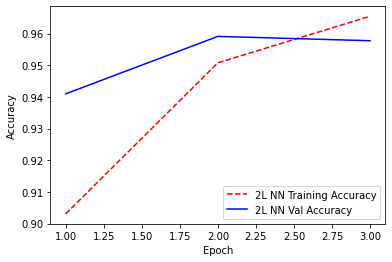

In [ ]:
# Get training and validation accuracy histories
training_acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, 3 + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['2L NN Training Accuracy', '2L NN Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

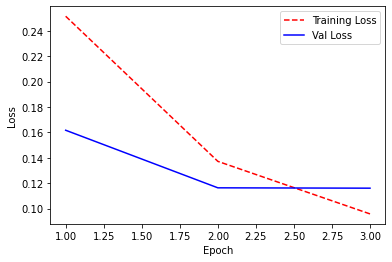

In [ ]:
training_loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
X_test

array(['modi promised per month farmers totally per year rahul promising per month poorest families totally per year',
       'what modi gave the people india who were glued their with their mouth wide open',
       'please tell what you not like about modi', ..., 'cold frio',
       'relax man modi will sweep this election becos there competition congress game keeping india weak poor and divided well understood voters but assembly elections will totally different',
       'peteralponse his campaign against modi thru media debates created rahul wave tnto garner minority support meets the president archbishops council madurai with feature stalian and secular candidates'],
      dtype=object)

In [ ]:
preds = model.evaluate(test_dataset, batch_size=32, verbose=1, sample_weight=None)

3046/3046 [==============================] - 329s 108ms/step - loss: 0.1161 - accuracy: 0.9588


In [ ]:
preds= np.argmax(model.predict(test_dataset2), axis=-1)
#printing classification_report & confusion_matrix
print(classification_report(y_test,preds ))
print(confusion_matrix(y_test, preds))

3046/3046 [==============================] - 324s 106ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     39306
           1       0.87      0.92      0.90      9430

    accuracy                           0.96     48736
   macro avg       0.93      0.94      0.94     48736
weighted avg       0.96      0.96      0.96     48736

[[38062  1244]
 [  766  8664]]


#pipeline for getting predictions

In [88]:
def getpredictions(text):
  preprocess(text)
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts([text])
  vocab_length = len(tokenizer.word_index) + 1
  padded_sentence = pad_sequences(
  tokenizer.texts_to_sequences([text]), 
    length_long_sentence, 
    padding='post'
  )
  preds=model.predict(padded_sentence)
  return np.argmax(preds)

In [90]:
getpredictions('I love you')

1/1 [==============================] - 0s 41ms/step


0